# Data Visualization with Python Matplotlib for Beginner - Part 1

<p><b>About :</b> Membekali kamu untuk mengerti pemanfaatan library matplotlib dalam melakukan visualisasi data menggunakan pemrograman python. Pada Part 1, kamu diharapkan dapat memahami bagaimana membuat sebuah plot dengan matplotlib, dan mampu memodifikasi berbagai komponen di dalam plot tersebut.</p>

<p><b>Course :</b> <a href=https://academy.dqlab.id/main/package/practice/164?pf=0>Data Visualization with Python Matplotlib for Beginner - Part 1</a></p>

<h2>Module Content:</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#pengenalan-matplotlib">Pengenalan Matplotlib dan Persiapan Dataset</a></li>
        <li><a href="#plot-pertama">Plot Pertama dengan Matplotlib</a></li>
        <li><a href="#kustomisasi-grafik">Kustomisasi Grafik</a></li>
        <li><a href="#mini-quiz">Mini Quiz</a></li>
    </ul>
</div>

<h2><a name="pengenalan-matplotlib"></a>Chapter 1: Pengenalan Matplotlib dan Persiapan Dataset</h2>

<p>Dalam menganalisa data, sering kali menggunakan visualisasi data untuk memahami karakteristik maupun trend di dalam data yang dimiliki.</p>

<p>Salah satu library di python yang biasa digunakan untuk keperluan visualisasi data adalah matplotlib.</p>

 

<p>Dalam modul ini, akan dijelaskan beberapa hal yang dapat dilakukan dengan matplotlib. Di antaranya:</p>

<li>Pengolahan dataset (menggunakan library NumPy & Pandas).</li>
<li>Membuat grafik dasar menggunakan matplotlib.</li>
<li>Melakukan modifikasi komponen visualisasi, seperti axis, labels, title, dan legend.</li>
<li>Menyimpan plot visualisasi yang sudah dibuat</li>

<h4>Persiapan Dataset</h4>

In [2]:
import pandas as pd

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
dataset.head()

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


<p>Deskripsi feature pada dataset diatas</p>
<li><b>order_id</b> : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer</li>
<li><b>order_date</b> : tanggal terjadinya transaksi</li>
<li><b>customer_id</b> : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali</li>
<li><b>city</b> : kota tempat toko terjadinya transaksi</li>
<li><b>province</b> : provinsi (berdasarkan city)</li>
<li><b>product_id</b> : ID dari suatu product yang dibeli</li>
<li><b>brand</b> : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama</li>
<li><b>quantity</b> : Kuantitas / banyaknya product yang dibeli</li>
<li><b>item_price</b> : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli</li>

<h4>Menampilkan Gross Merchandise Value atau total uang yang dibayarkan customer.</h4>

In [5]:
import datetime

# tambahkan kolom 'order_month'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


Definisikan GMV adalah perkalian setiap entri di kolom item_price dan kolom quantity. Bisa saja menggunakan fungsi apply & lambda seperti tadi, tetapi ada cara yang lebih mudah yaitu dengan mengalikan kedua kolom yang disebutkan secara langsung.

In [6]:
# tambahkan kolom 'gmv'
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
dataset.head()

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


<h2><a name="plot-pertama"></a>Chapter 2: Plot Pertama dengan Matplotlib</h2>

<h4>Membuat Data Agregat</h4>

In [7]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
monthly_amount

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


<h4>Line Chart Trend Pertumbuhan GMV</h4>

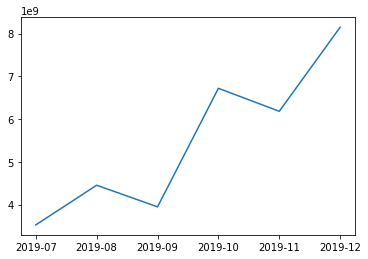

In [8]:
import matplotlib.pyplot as plt

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

<h4>Cara Alternatif: Fungsi <code>.plot()</code> pada pandas Dataframe</h4>

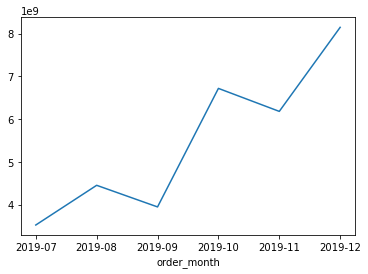

In [9]:
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

<h2><a name="kustomisasi-grafik"></a>Chapter 3: Kustomisasi Grafik</h2>

<h4>Anatomi dari Figure</h4>

<p>Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.</p>

<li>Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.</li>
<li>Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. </li>
<li>Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:</li>
<ul>
    <li>Axis Label: Nama dari sumbu yang ditampilkan.</li>
    <li>Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.</li>
    <li>Tick Label: Tulisan di tiap tick yang menyatakan nilainya.</ul></li>
<li>Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot / histogram).</li>
<li>Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.</li>
 
<p>Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: <a href="https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html">https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html.</a></p>

<h2><a name="mini-quiz"></a>Chapter 4: Mini Quiz</h2>

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Harga Rumah di Tangerang</b>
    <div style="padding:25px">
        <p>Di perusahaan ini, seorang analis data yang masuk umumnya berusia 21, memiliki pendapatan senilai 6.500.000 dan insentif lembur senilai 100.000. Kemudian, untuk seorang ilmuwan data yang masuk umumnya berusia 25, memiliki pendapatan senilai 12.000.000, dan insentif lembur senilai 150.000. Di sisi lain, untuk tenaga lepas, hanya terdapat pendapatan umum senilai 4000000 untuk pembersih data dan 2500000 untuk dokumenter teknis.<p>
        <p>Berikut adalah data perusahaan beserta detail karyawan yang bekerja.</p>
        <p>Nama Perusahaan: ABC; Alamat: Jl. Jendral Sudirman, Blok 11; Telepon: (021) 95812XX</p>
        <table>
            <thead>
                <th>Nama</th>
                <th>Usia</th>
                <th>Pekerjaan</th>
                <th>Pendapatan</th>
            </thead>
            <tbody>
                <tr>
                    <td>Ani</td>
                    <td>25</td>
                    <td>Pembersih Data</td>
                    <td>-</td>
                </tr>
                <tr>
                    <td>Budi</td>
                    <td>18</td>
                    <td>Dokumenter Teknis</td>
                    <td>-</td>
                </tr>
                <tr>
                    <td>Cici</td>
                    <td>-</td>
                    <td>Ilmuwan Data</td>
                    <td>-</td>
                </tr>
                <tr>
                    <td>Didi</td>
                    <td>32</td>
                    <td>Ilmuwan Data</td>
                    <td>20000000</td>
                </tr>
                <tr>
                    <td>Efi</td>
                    <td>-</td>
                    <td>Analis Data</td>
                    <td>-</td>
                </tr>
                <tr>
                    <td>Febi</td>
                    <td>28</td>
                    <td>Analis Data</td>
                    <td>12000000</td>
                </tr>
            </tbody>
        </table>
        <p><b>Note:</b> saat usia/pendapatan kosong maka usia/pendapatan mengikuti standar perusahaan.</p>
        <li>Simulasikan dengan program yang telah dibuat.</li>
        <li>Cetak total pengeluaran yang dimiliki perusahaan untuk menguji fungsionalitas konsep dan teknik polymorphism yang diterapkan.</li>
    </div>
</div>